# Handling Libraries

In [1]:
# Installing the required libraries
!pip install transformers
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.4
!pip install ffmpeg-python
!pip install speechrecognition

Requirement already up-to-date: mxnet-cu101==1.7.0 in /usr/local/lib/python3.7/dist-packages (1.7.0)


In [2]:
# Importing the required libraries
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from google.colab import drive
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd
import glob 
from scipy.io import wavfile
from scipy.fftpack import fft
import scipy
import sys
import warnings
import IPython.display as ipd
from itertools import chain
import tqdm
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import matplotlib.pyplot as plt
import itertools

from keras.models import model_from_json
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models, Model, optimizers
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from random import randint
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from matplotlib import pyplot
import seaborn as sns
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg
import soundfile as sf
import speech_recognition as sr
from tensorflow.keras.models import load_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Speech processing to create a model that detects the emotion of speech

In [ ]:
# Storing a list with the raw audio file paths got from The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)
path_1='/content/drive/MyDrive/AI_3_Chatbot/Audio_Speech_Actors_01-24/'+'Actor_'
path_full_1=[]
list_1=[]
for i in range(1,25):
  string=str(i)
  if(i<10):
    string='0'+str(i)
  path_full_1.append([path_1+string+'/'+j for j in os.listdir(path_1+string)])
  list_1.append(os.listdir(path_1+string))

# Optional dataset
# Storing a list with the raw audio file paths got from the Surrey Audio-Visual Expressed Emotion (SAVEE) Database
path_2='/content/drive/MyDrive/AI_3_Chatbot/AudioData/AudioData/'
list_2=[]
path_full_2=[]
for i in ['DC','JE','JK','KL']:
  path_full_2.append([path_2+i+'/'+j for j in os.listdir(path_2+i)])
  list_2.append(os.listdir(path_2+i))


In [ ]:
# Taking a look at the lists
print(list_1[:5])
print(list_2[:5])

[['03-01-02-01-01-01-01.wav', '03-01-02-02-01-01-01.wav', '03-01-01-01-02-01-01.wav', '03-01-03-02-01-02-01.wav', '03-01-02-01-01-02-01.wav', '03-01-02-01-02-02-01.wav', '03-01-02-01-02-01-01.wav', '03-01-01-01-02-02-01.wav', '03-01-01-01-01-01-01.wav', '03-01-01-01-01-02-01.wav', '03-01-03-01-01-01-01.wav', '03-01-02-02-02-02-01.wav', '03-01-02-02-01-02-01.wav', '03-01-02-02-02-01-01.wav', '03-01-03-01-02-02-01.wav', '03-01-03-01-02-01-01.wav', '03-01-03-02-01-01-01.wav', '03-01-03-01-01-02-01.wav', '03-01-07-02-01-02-01.wav', '03-01-04-02-02-01-01.wav', '03-01-06-02-01-01-01.wav', '03-01-03-02-02-02-01.wav', '03-01-04-02-01-02-01.wav', '03-01-07-01-01-02-01.wav', '03-01-05-01-02-02-01.wav', '03-01-06-01-01-02-01.wav', '03-01-08-02-01-01-01.wav', '03-01-08-02-02-02-01.wav', '03-01-06-02-02-01-01.wav', '03-01-08-01-02-01-01.wav', '03-01-04-02-02-02-01.wav', '03-01-05-02-02-02-01.wav', '03-01-04-01-02-01-01.wav', '03-01-05-01-01-02-01.wav', '03-01-04-02-01-01-01.wav', '03-01-07-02-02-02

# EDA

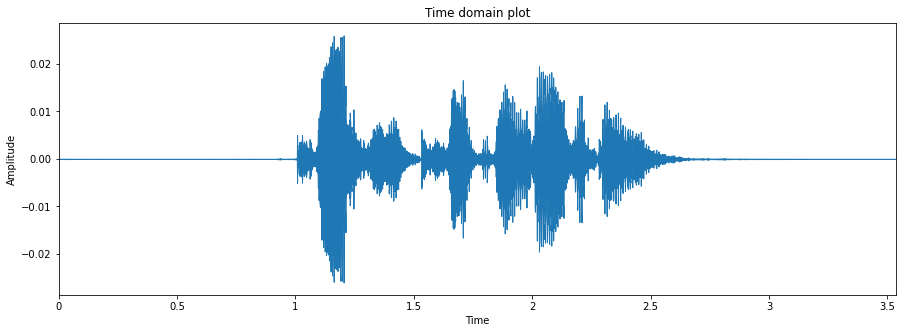

In [ ]:
# Loading a calm audio wave to display
data,sampling_rate= librosa.load(path_1+"01/"+list_1[0][0])
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate);
plt.title("Time domain plot");
plt.ylabel("Amplitude");

In [ ]:
# Having a listen to the calm and happy audio
print("Calm Audio")
ipd.Audio(path_1+"01/"+list_1[0][0])

Calm Audio


In [ ]:
print("Happy Audio")
ipd.Audio(path_1+"01/"+list_1[0][3])

Happy Audio


Frequency sampling 22050
Channels 1
Complete Samplings N 77988
Secs 3.53687074829932
Timestep between samples Ts 4.5351473922902495e-05


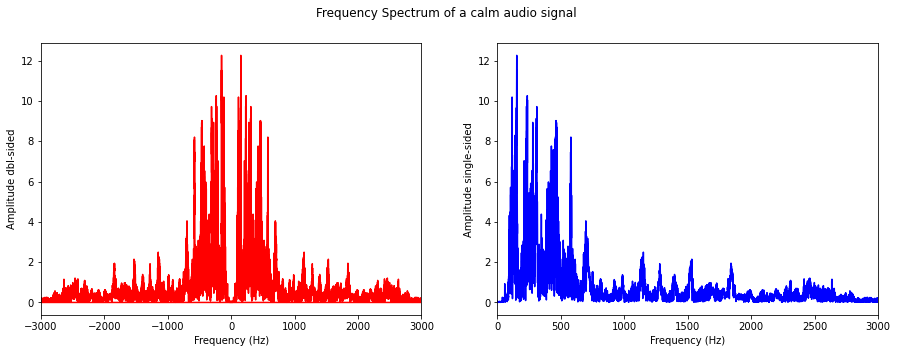

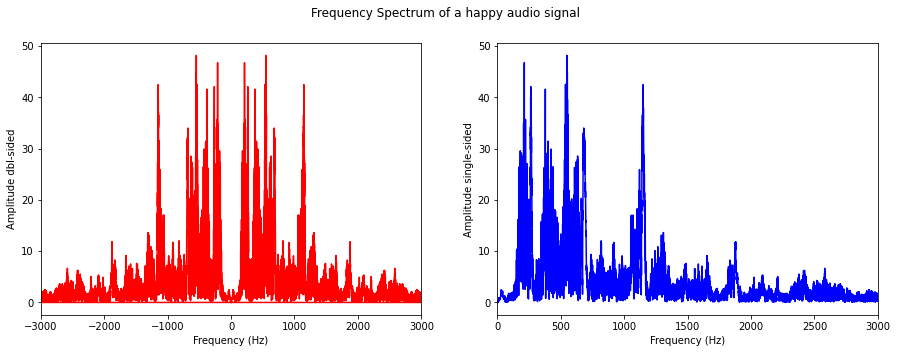

In [ ]:
# Filtering depreciation warnings
warnings.filterwarnings("ignore")

# Loading the calm audio file to display the frequency plot
signal,fs_rate = librosa.load(path_1+"01/"+list_1[0][0])

print ("Frequency sampling", fs_rate)
l_audio = len(signal.shape)
print ("Channels", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0]
print ("Complete Samplings N", N)
secs = N / float(fs_rate)
print ("Secs", secs)
Ts = 1.0/fs_rate # Sampling interval in time
print ("Timestep between samples Ts", Ts)


# Plotting the frequency spectrum - happy audio
t = scipy.arange(0, secs, Ts) # Time vector as scipy arange field / numpy.ndarray
FFT = abs(scipy.fft(signal))
FFT_side = FFT[range(N//2)] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(N//2)] # one side frequency range
fft_freqs_side = np.array(freqs_side)

fig=plt.figure(figsize=(15, 5))
fig.suptitle("Frequency Spectrum of a calm audio signal")
ax1=fig.add_subplot(121)
ax1.plot(freqs, FFT, "r") # Plotting the complete fft spectrum
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude dbl-sided')
ax1.set_xlim([-3000, 3000])

ax2=fig.add_subplot(122)
ax2.plot(freqs_side, abs(FFT_side), "b") # Plotting the positive fft spectrum
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude single-sided')
ax2.set_xlim([0, 3000])
fig.show();

# Loading the happy audio file to display the frequency plot
signal, fs_rate = librosa.load(path_1+"01/"+list_1[0][3])

# Plotting the frequency spectrum - fear audio
t = scipy.arange(0, secs, Ts) # Time vector as scipy arange field / numpy.ndarray
FFT = abs(scipy.fft(signal))
FFT_side = FFT[range(N//2)] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(N//2)] # one side frequency range
fft_freqs_side = np.array(freqs_side)

fig=plt.figure(figsize=(15, 5))
fig.suptitle("Frequency Spectrum of a happy audio signal")
ax1=fig.add_subplot(121)
ax1.plot(freqs, FFT, "r") # Plotting the complete fft spectrum
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude dbl-sided')
ax1.set_xlim([-3000, 3000])

ax2=fig.add_subplot(122)
ax2.plot(freqs_side, abs(FFT_side), "b") # Plotting the positive fft spectrum
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude single-sided')
ax2.set_xlim([0, 3000])
fig.show();

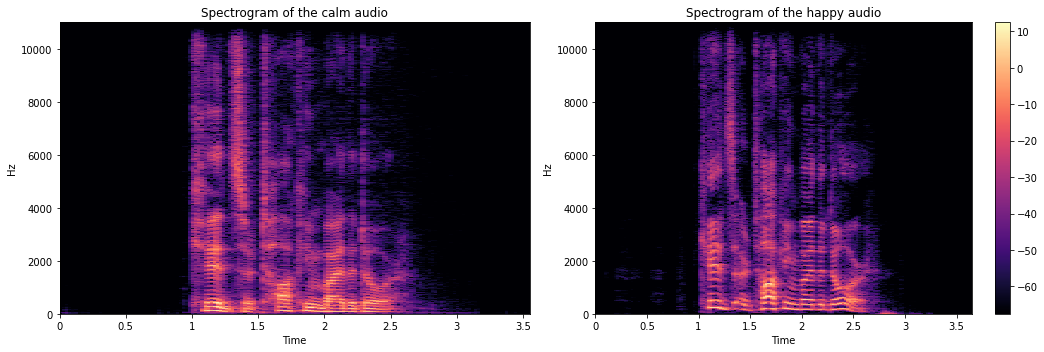

In [ ]:
# Displaying the spectrogram of the happy audio signal
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(121)
img1=librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz',ax=ax1)
ax1.set_title("Spectrogram of the calm audio")


data,sampling_rate= librosa.load(path_1+"01/"+list_1[0][3])
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
ax2=fig.add_subplot(122)
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz',ax=ax2)
ax2.set_title("Spectrogram of the happy audio")
fig.colorbar(img1)
fig.tight_layout();

In [ ]:
# Aggregating all the paths and file names
path_all=list(chain.from_iterable(path_full_1+path_full_2))
list_all=list(chain.from_iterable(list_1+list_2))

In [ ]:
print(path_all[:5],path_all[-5:])
print(list_all[:5],list_all[-5:])

['/content/drive/MyDrive/AI_3_Chatbot/Audio_Speech_Actors_01-24/Actor_01/03-01-02-01-01-01-01.wav', '/content/drive/MyDrive/AI_3_Chatbot/Audio_Speech_Actors_01-24/Actor_01/03-01-02-02-01-01-01.wav', '/content/drive/MyDrive/AI_3_Chatbot/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-02-01-01.wav', '/content/drive/MyDrive/AI_3_Chatbot/Audio_Speech_Actors_01-24/Actor_01/03-01-03-02-01-02-01.wav', '/content/drive/MyDrive/AI_3_Chatbot/Audio_Speech_Actors_01-24/Actor_01/03-01-02-01-01-02-01.wav'] ['/content/drive/MyDrive/AI_3_Chatbot/AudioData/AudioData/KL/sa09.wav', '/content/drive/MyDrive/AI_3_Chatbot/AudioData/AudioData/KL/su12.wav', '/content/drive/MyDrive/AI_3_Chatbot/AudioData/AudioData/KL/su03.wav', '/content/drive/MyDrive/AI_3_Chatbot/AudioData/AudioData/KL/sa14.wav', '/content/drive/MyDrive/AI_3_Chatbot/AudioData/AudioData/KL/sa15.wav']
['03-01-02-01-01-01-01.wav', '03-01-02-02-01-01-01.wav', '03-01-01-01-02-01-01.wav', '03-01-03-02-01-02-01.wav', '03-01-02-01-01-02-01.wav'] ['sa09.

In [ ]:
import gc

# Data Augmentation

In [ ]:
# FUNCTION TO ADD WHITE NOISE
def noise_fn(y):
    noise_amp = 0.05*np.random.uniform()*np.amax(y)   
    y = y.astype('float64') + noise_amp * np.random.normal(size=y.shape[0])
    return y

# FUNCTION TO STRETCH THE SOUND
def stretch_fn(y, rate=0.8):
    data = librosa.effects.time_stretch(y, rate)
    return data

# FUNCTION TO INCREASE SPEED AND PITCH 
def speedNpitch(y):
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.4  / length_change 
    tmp = np.interp(np.arange(0,len(y),speed_fac),np.arange(0,len(y)),y)
    minlen = min(y.shape[0], tmp.shape[0])
    y *= 0
    y[0:minlen] = tmp[0:minlen]
    return y

In [ ]:
#Getting the labels of the data, augmenting the data and converting to 
features=[]
feeling_list=[]
path_save='/content/drive/MyDrive/AI_3_Chatbot/data/'
for count,(item,path) in tqdm.notebook.tqdm(enumerate(zip(list_all,path_all))):
    if(count<940):
      continue
    flag=0
    if item[6:-16]=='02':
        feeling_list.append('calm')
        flag=1
    elif item[6:-16]=='01':
        feeling_list.append('neutral')
        flag=1
    elif item[6:-16]=='03':
        feeling_list.append('happy')
        flag=1
    elif item[6:-16]=='04':
        feeling_list.append('sad')
        flag=1
    elif item[6:-16]=='05':
        feeling_list.append('angry')
        flag=1
    elif item[6:-16]=='06':
        feeling_list.append('fearful')
        flag=1
    elif item[6:-16]=='07':
        feeling_list.append('disgust')
        flag=1
    elif item[6:-16]=='08':
        feeling_list.append('surprised')
        flag=1
    emotion=feeling_list[-1]
    
    
    path_dir='/content/drive/MyDrive/AI_3_Chatbot/sorted/data/{0}/'.format(emotion)
    try:
      os.makedirs(path_dir)
    except:
      pass
    if(flag==1):
        y, sr = librosa.load(path,sr=22050*2,offset=0.5,duration=4,res_type='kaiser_fast')
        yt,_=librosa.effects.trim(y)
        y=yt
        # Mel-Spectrogram
        path_save='/content/drive/MyDrive/AI_3_Chatbot/sorted/data/{0}/{1}_{2}.jpeg'.format(emotion,"Mel_spectrogram",str(count))
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(mel_spec)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)
        plt.close();

        # Noisy
        path_save='/content/drive/MyDrive/AI_3_Chatbot/sorted/data/{0}/{1}_{2}.jpeg'.format(emotion,"Noisy",str(count))
        noisy = noise_fn(y)
        mel_spec = librosa.feature.melspectrogram(y=noisy, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(mel_spec)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)
        plt.close();

        # Stretch
        path_save='/content/drive/MyDrive/AI_3_Chatbot/sorted/data/{0}/{1}_{2}.jpeg'.format(emotion,"Stretch",str(count))
        stretch= stretch_fn(y)
        mel_spec = librosa.feature.melspectrogram(y=stretch, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(mel_spec)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)
        plt.close();

        # Speed and Pitch
        path_save='/content/drive/MyDrive/AI_3_Chatbot/sorted/data/{0}/{1}_{2}.jpeg'.format(emotion,"SpeednPitch",str(count))
        speed_pitch= speedNpitch(y)
        mel_spec = librosa.feature.melspectrogram(y=speed_pitch, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(mel_spec)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)
        plt.close();
    gc.collect()

In [ ]:
angry = glob.glob('/content/drive/My Drive/AI_3_Chatbot/sorted/data/angry/*.*')
calm = glob.glob('/content/drive/My Drive/AI_3_Chatbot/sorted/data/calm/*.*')
disgust = glob.glob('/content/drive/My Drive/AI_3_Chatbot/sorted/data/disgust/*.*')
fearful = glob.glob('/content/drive/My Drive/AI_3_Chatbot/sorted/data/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/AI_3_Chatbot/sorted/data/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/AI_3_Chatbot/sorted/data/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/AI_3_Chatbot/sorted/data/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/AI_3_Chatbot/sorted/data/surprised/*.*')

In [ ]:
data = []
labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Surprised')



In [ ]:
data = np.array(data)
labels = np.array(labels)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state=22, stratify=labels)

In [ ]:
# Check shapes of training and testing sets
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (4032, 224, 224, 3), y_train has a shape of (4032,)
X_test has a shape of (1728, 224, 224, 3), y_test has a shape of (1728,)


In [ ]:
# Finally, we normalize pixels in X_train and X_test to the range [0,1] for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Fine-Tuning the VGG-16 model to detect emotion

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten True
20 dense True
21 dropout True
22 dense_1 True
23 dense_2 True


In [ ]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('ftzq.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
callback = EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
train_datagen = ImageDataGenerator(
                                    zoom_range=0.3,
                                   rotation_range=20,
                                   width_shift_range=0.15)
#                                   #  height_shift_range=0.4,
#                                   #  shear_range=0.3,
#                                   #  horizontal_flip=True, 
#                                   #  fill_mode='nearest')

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)

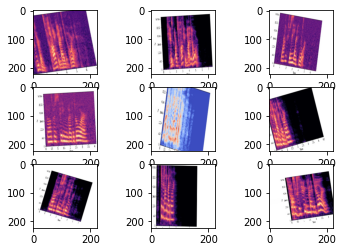

In [ ]:
img_rows, img_cols = 224, 224

for x, y in train_datagen.flow(X_train, y_train, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = transfer_model.fit_generator(train_generator,
                    # steps_per_epoch=10,
                    validation_data=(X_test,y_test),
                    # validation_steps=20,
                    epochs=80,
                    callbacks=[lr_reduce,checkpoint, callback])
                    # shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
4032/4032 [==============================] - 120s 22ms/step - loss: 1.8943 - accuracy: 0.2587 - val_loss: 1.6065 - val_accuracy: 0.4300

Epoch 00001: val_accuracy improved from -inf to 0.42998, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
Epoch 2/80
4032/4032 [==============================] - 87s 22ms/step - loss: 1.5128 - accuracy: 0.4449 - val_loss: 1.3381 - val_accuracy: 0.5150

Epoch 00002: val_accuracy improved from 0.42998 to 0.51505, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
Epoch 3/80
4032/4032 [==============================] - 88s 22ms/step - loss: 1.3235 - accuracy: 0.5186 - val_loss: 1.1677 - val_accuracy: 0.5596

Epoch 00003: val_accuracy improved from 0.51505 to 0.55961, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
Epoch 4/80
4032/4032 [==============================] - 89s 22ms/step - loss: 1.1627 - accuracy: 0.5685 - val_loss: 1.2389 - val_accuracy: 0.5764

Epoch 

In [ ]:
transfer_model.save_weights("/content/drive/MyDrive/AI_3_Chatbot/models/emotion_model_weights.h5")
transfer_model.save('/content/drive/MyDrive/AI_3_Chatbot/models/emotion_model.h5')
print("Saved model to disk")

Saved model to disk


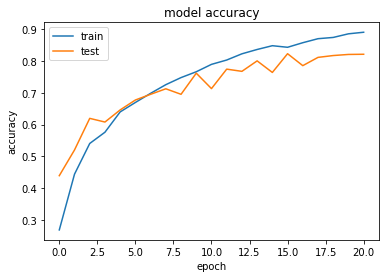

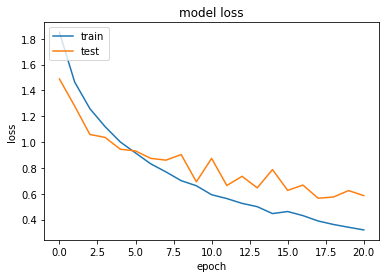

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

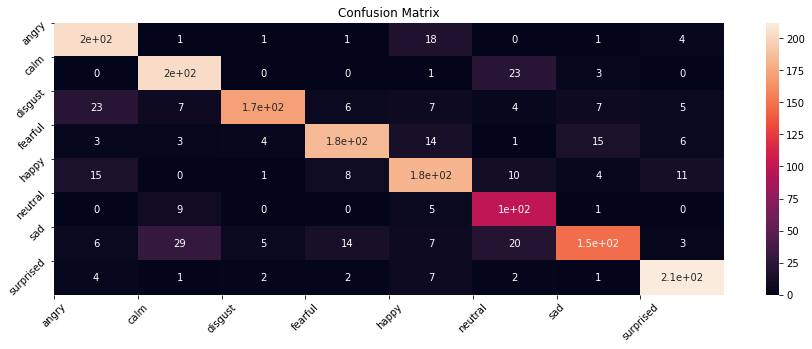

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plt.figure(figsize=(15, 5))
sns.heatmap(confusion_mtx, annot=True)
plt.xticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.yticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.80      0.89      0.84       230
        calm       0.80      0.88      0.84       230
     disgust       0.93      0.74      0.83       230
     fearful       0.86      0.80      0.83       230
       happy       0.76      0.79      0.77       231
     neutral       0.62      0.87      0.73       115
         sad       0.82      0.64      0.72       231
   surprised       0.88      0.92      0.90       231

    accuracy                           0.81      1728
   macro avg       0.81      0.82      0.81      1728
weighted avg       0.82      0.81      0.81      1728



In [3]:
#Loading the model
transfer_model = load_model('/content/drive/MyDrive/AI_3_Chatbot/models/emotion_model.h5')
#transfer_model.load_weights('/content/drive/MyDrive/AI_3_Chatbot/models/emotion_model_weights.h5')

# Recieving Audio Input from User

In [5]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""


AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [6]:
def get_text_emo(count=0, ):
  audio, sample_rate = get_audio()
  # Saving the audio file
  path = f"/content/drive/MyDrive/AI_3_Chatbot/audio_rec/audio_{count}.wav"
  sf.write(path, audio, sample_rate)
  
  # Getting the Spectrogram of the audio
  y, sample_rate = librosa.load(path,sr=22050*2,offset=0.5,duration=4,res_type='kaiser_fast')
  yt,_=librosa.effects.trim(y)
  y=yt
  # Mel-Spectrogram
  path_save=f"/content/drive/MyDrive/AI_3_Chatbot/audio_rec/spectrogram_{count}.jpeg"
  mel_spec = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_mels=128,fmax=8000)
  db_spec = librosa.power_to_db(mel_spec)
  librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
  plt.savefig(path_save);
  plt.close();

  #Preparing the input to emotion model
  image = tf.keras.preprocessing.image.load_img(path_save, color_mode='rgb', target_size= (224,224))
  image = np.array(image)
  image = np.expand_dims(image, axis=0)
  pred = transfer_model(image)
  scores=pred
  dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
  index = np.argmax(pred,axis=1) 
  emotion = dict_characters[index[0]]

  # Getting the text from the audio
  audio_path = sr.AudioFile(f'/content/drive/MyDrive/AI_3_Chatbot/audio_rec/audio_{count}.wav')
  r = sr.Recognizer()
  with audio_path as source:
    audio_load = r.record(source)
  text = r.recognize_google(audio_load)
  return text, emotion, scores

In [ ]:
# Sample output from the emotion detector
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
text, emotion,scores=get_text_emo()
print("Detected Text :", text)
print("Predicted Emotion:",emotion)
print("Classwise Scores")
for count,i in enumerate(np.array(scores)[0]):
  print("Class ",dict_characters[count]," has a score of ", np.round(i,2))

Detected Text : what the hell
Predicted Emotion: angry
Classwise Scores
Class  angry  has a score of  0.91
Class  calm  has a score of  0.0
Class  disgust  has a score of  0.0
Class  fearful  has a score of  0.09
Class  happy  has a score of  0.0
Class  neutral  has a score of  0.0
Class  sad  has a score of  0.0
Class  surprised  has a score of  0.0


# Making the Chatbot

In [4]:
responses = {'angry':"Having a bad day? You seem to be angry", 'calm': "I see that you are quite calm. Glad the therapy is working out!", 'disgust': "Relax, I am just tyring to have a conversation here!", 'fearful': "Don't worry! I am not Donald Trump.", 'happy': "Hey hey, someone's in a good mood.", 'neutral': " ", 'sad': "Hey! cheer up.", 'surprised': "Surprised? I know. I can read your mind."}

In [5]:

def load_tokenizer_and_model(model="microsoft/DialoGPT-large"):
  """
    Load tokenizer and model instance for some specific DialoGPT model.
  """
  # Initialize tokenizer and model
  print("Loading model...")
  tokenizer = AutoTokenizer.from_pretrained(model)
  model = AutoModelForCausalLM.from_pretrained(model)
  
  # Return tokenizer and model
  return tokenizer, model


def generate_response(tokenizer, model, chat_round, chat_history_ids):
  """
    Generate a response to some user input.
  """
  # Encode user input and End-of-String (EOS) token
  text, emotion,_ = get_text_emo(chat_round)
  print(">> You:", text)
  new_input_ids = tokenizer.encode(text + tokenizer.eos_token, return_tensors='pt')

  # Append tokens to chat history
  bot_input_ids = torch.cat([chat_history_ids, new_input_ids], dim=-1) if chat_round > 0 else new_input_ids
  responses = {'angry':"Having a bad day? You seem to be angry", 'calm': "I see that you are quite calm. Glad the therapy is working out!", 'disgust': "Relax, I am just tyring to have a conversation here!", 'fearful': "Don't worry! I am not Donald Trump.", 'happy': "Hey hey, someone's in a good mood.", 'neutral': " ", 'sad': "Hey! cheer up.", 'surprised': "Surprised? I know. I can read your mind."}
  # Generate response given maximum chat length history of 1250 tokens
  chat_history_ids = model.generate(bot_input_ids, max_length=1250, pad_token_id=tokenizer.eos_token_id)
  print("Emotion detected ", emotion )
  print(">> DialoGPT:",responses[emotion])
  # Print response
  print("{}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))
  
  # Return the chat history ids
  return chat_history_ids


def chat_for_n_rounds(n=5):
  """
  Chat with chatbot for n rounds (n = 5 by default)
  """
  
  # Initialize tokenizer and model
  tokenizer, model = load_tokenizer_and_model()
  
  # Initialize history variable
  chat_history_ids = None
  
  # Chat for n rounds
  for chat_round in range(n):
    chat_history_ids = generate_response(tokenizer, model, chat_round, chat_history_ids)



In [ ]:
chat_for_n_rounds(1)

Loading model...


>> You: what did the doctor tell the receptionist
Emotion detected  angry
DialoGPT: Having a bad day? You seem to be angry
I don't know, but I think it was something about the doctor's wife.


In [ ]:
chat_for_n_rounds(3)

Loading model...


### Here we see the clear bias in the model

# Debiasing Words in GloveEmbeddings for curbing Gender Discrimination

Natural language processing (NLP) is one of the biggest areas of machine learning research, and although current linguistic machine learning models achieve numerically-high performance on many language-understanding tasks, they often lack optimization for reducing implicit biases.

What is bias in machine learning models? Essentially, it’s when machine learning algorithms express implicit biases that often pass undetected during testing because most papers test their models for raw accuracy. Take, for example, the following instances of deep learning models expressing gender bias. 

According to our deep learning models,
+ “He is doctor” has a higher likelihood than “She is doctor.” [Source]
+ Man is to woman as computer programmer is to homemaker. [Source]
+ Sentences with female nouns are more indicative of anger. [Source]
+ Translating “He is a nurse. She is a doctor” into Hungarian and back to English results in “She is a nurse. He is a doctor.” [Source]


In these examples, the algorithm is essentially expressing stereotypes, which differs from an example such as “man is to woman as king is to queen” because king and queen have a literal gender definition. Kings are defined to be male and queens are defined to be female. Computer programmers are not defined to be male and homemakers are not defined to be female, so “Man is to woman as computer programmer is to homemaker” is biased.

Other forms of bias other than gender bias are also prominent in our models. 
Here are examples of some other forms of bias:
+ According to machine learning models, black is to criminal as Caucasian is to police. [Source]
+ According to machine learning models, lawful is to Christianity as terrorist is to Islamic. [Source]
+ Tweets written by African Americans are more likely to be flagged as offensive by AI. [Source]

Credits: https://towardsdatascience.com/bias-in-natural-language-processing-nlp-a-dangerous-but-fixable-problem-7d01a12cf0f7

So how do you address this? Like many problems, bias in NLP can be addressed at the early stage or at the late stages. In this instance, the early stage would be debiasing the dataset, and the late stage would be debiasing the model.

In [ ]:
# Import libraries
import numpy as np

## What is GloVe embeddings?
GloVe stands for global vectors for word representation. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating global word-word co-occurrence matrix from a corpus. For our current project, we are using the embeddings derived from the words from Wikipedia - these are pre-trained word vectors. This data is made available under the Public Domain Dedication and License v1.0 whose full text can be found at: http://www.opendatacommons.org/licenses/pddl/1.0/.

In [ ]:
#Function takes in input of glove file and gives out corresponsing vector. 
def glove_vecs(glove_file):
    """Function Parameters: Path to glove vector.txt file"""
    # Open Text file in read mode 
    with open(glove_file, 'r') as f:
        # Creating empty set of words
        words = set()
        # Creating empty dictionary to store word:vector pair
        word_to_vec_map = {}
        
        # Reading file line by line
        # Each line is a string with space in between.
        for line in f:
            # Strip() function strips the string from both starting and end.
            # Split() function splits the string in separate elements around a space
            line = line.strip().split()
            # First element is the word 
            curr_word = line[0]
            # Adding the word to the set words.
            words.add(curr_word)
            # Adding current word and it's vector in the dictionary.
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
            
    return words, word_to_vec_map


#Using the above function to load GloveEmbeddings text file
words, word_to_vec_map = glove_vecs('glove.6B.50d.txt')

What is Cosine similarity?
It is the most widely used method to compare two vectors. It is a dot product between two vectors. We would find the cosine angle between the two vectors. For degree 0, cosine is 1 and it is less than 1 for any other angle.

In [ ]:
# Finding cosine similarity between 2 vectors.
def cosine_similarity(a , b ):
    """Function Parameters: a , b are 2 different vectors whose cosine similarity is to be found."""
    
    cos_similarity = np.dot(a , b) / (np.linalg.norm(a) * np.linalg.norm(b))
        
    return cos_similarity

# Finding distance between 2 vectors using L-2 Norm.
def L2distance(a , b):
    """Function Parameters: a , b are 2 different vectors whose cosine similarity is to be found."""
    
    l2_distance = np.linalg.norm(a - b)
    
    return l2_distance

#Using distance as means of figuring analogies
def word_analogy(a, b, c, word_to_vec_map):
    """Function Parameters: a , b , c are 3 words
       words_to_vec_map: dictionary of word vectors."""
    
    # Converting a,b and c to lower case.
    a = a.lower()
    b = b.lower()
    c = c.lower()
    
    # Finding the vectors for the given words:
    
    a_vec = word_to_vec_map[a]
    b_vec = word_to_vec_map[b]
    c_vec = word_to_vec_map[c]
    
    # Getting all the words from the dictionary.
    
    words = word_to_vec_map.keys()
    
    # Setting maximum cosine similarity to large negative number.
    
    maximum_cosine_similarity = -500
    
    # Looping over all the words to find the best fit for the analogy.
    
    for w in words:
        
        # Skip a , b and c
        if w in [a,b,c]:
            continue
            
        cos_similarity = cosine_similarity(b_vec - a_vec , word_to_vec_map[w] - c_vec ) 
        
        if cos_similarity > maximum_cosine_similarity:
            # Overiting maximum_cosine_similarity 
            maximum_cosine_similarity = cos_similarity
            # Saving the best word giving maximum_cosine_similarity
            best_word = w
    
    
    return best_word

In [ ]:
#Example of a word analogy
print("Italy::Italian as America::"+word_analogy('italy', 'italian', 'america', word_to_vec_map))

Italy::Italian as America::american


In [ ]:
x = word_to_vec_map['woman'] - word_to_vec_map['man']

# Let us see similarity between some gender specific names and the vector'x'
names = ['ronaldo' , 'jack', 'marie' , 'priya']
for name in names:
    print(cosine_similarity(word_to_vec_map[name], x))

-0.31244796850329437
-0.16566299861636427
0.315597935396073
0.17632041839009402


We see that male names have negative similarity and female names have positive similarity. That's OK because\nthe vector x is woman - man.

In [ ]:
# Let us see similarity between some words that should be non-gender specific.
common_words = ['technology' , 'engineer' , 'doctor','grandfather','grandmother','literature']

for word in common_words:
    print(cosine_similarity(word_to_vec_map[word], x))

print("We see that words like technology , engineer are inclined towards man while literature is inclined towards woman.")

-0.13193732447554302
-0.0803928049452407
0.11895289410935041
0.023629798450867857
0.3846014363741861
0.06472504433459932
We see that words like technology , engineer are inclined towards man while literature is inclined towards woman.


We see that words like technology , engineer are inclined towards man while literature is inclined towards woman.

## Neutralizing Gender Bias 
To neutralize non-gender specific words, one approach to take would be to reduce the similarity between words of gender such as man and woman. 
For this, we need to find the bias direction from the vector of the word and then subtract this from original word vector.

In [ ]:
def neutralize(word , x , word_to_vec_map):
    # Extracting word vector from the dictionary.
    w = word_to_vec_map[word]
    
    # Finding the bias direction
    bias_direction = np.dot(w,x) * x /np.square((np.linalg.norm(x)))
    
    w_unbiased = w - bias_direction
    
    return w_unbiased


#### Bias direction is given by projection of the word vector 'w' onto the direction of vector x. bias_direction = w . x/|x|

In [ ]:
w = "literature"
print("cosine similarity between " + w + " and x, before neutralizing: ", cosine_similarity(word_to_vec_map["literature"], x))

e_unbiased = neutralize("literature", x, word_to_vec_map)
print("cosine similarity between " + w + " and x, after neutralizing: ", cosine_similarity(e_unbiased, x))

cosine similarity between literature and x, before neutralizing:  0.06472504433459932
cosine similarity between literature and x, after neutralizing:  -3.124605127029257e-17


## Equalizing Word Pairs 
We want word pairs like (father, mother) , (actor,actress) etc. to be equidistant from the words we neutralized above. Or in other words, these words should be equidistant from the non-bias axis/direction.
In the function below, we apply the equalizing algorithms given by Boliukbasi et al. (https://arxiv.org/abs/1607.06520)

In [ ]:
def equalize(w1, w2, bias_axis, word_to_vec_map):
    # Extracting vectors from dictionary.
    
    w1_vec = word_to_vec_map[w1]
    
    w2_vec = word_to_vec_map[w2]
    
    # The equations implemented below are described in the paper in the given link.
    mu = (w1_vec + w2_vec) / 2
    
    # Projection of mu over bias_axis and the orthogonal axis.
    mu_B = np.dot(mu,bias_axis) * bias_axis / np.square(np.linalg.norm(bias_axis))
    mu_orth = mu - mu_B
    
    w1_vecB = np.dot(w1_vec,bias_axis) * bias_axis / np.square(np.linalg.norm(bias_axis))
    w2_vecB = np.dot(w2_vec,bias_axis) * bias_axis / np.square(np.linalg.norm(bias_axis))
    
    w1_vecB_corrected = np.sqrt(np.absolute(1 - np.square(np.linalg.norm(mu_orth)))) * (w1_vecB - mu_B) / np.absolute((w1_vec - mu_orth) - mu_B) 
    w2_vecB_corrected = np.sqrt(np.absolute(1 - np.square(np.linalg.norm(mu_orth)))) * (w2_vecB - mu_B) / np.absolute((w2_vec - mu_orth) - mu_B)
    
    e1 = w1_vecB_corrected  + mu_orth
    e2 = w2_vecB_corrected  + mu_orth
    
    return e1 , e2

In [ ]:
print("cosine similarities before equalizing:")
print("cosine_similarity(word_to_vec_map[\"man\"], gender) = ", cosine_similarity(word_to_vec_map["man"], x))
print("cosine_similarity(word_to_vec_map[\"woman\"], gender) = ", cosine_similarity(word_to_vec_map["woman"], x))
print()
e1, e2 = equalize("man", "woman", x, word_to_vec_map)
print("cosine similarities after equalizing:")
print("cosine_similarity(e1, gender) = ", cosine_similarity(e1, x))
print("cosine_similarity(e2, gender) = ", cosine_similarity(e2, x))

cosine similarities before equalizing:
cosine_similarity(word_to_vec_map["man"], gender) =  -0.11711095765336832
cosine_similarity(word_to_vec_map["woman"], gender) =  0.35666618846270376

cosine similarities after equalizing:
cosine_similarity(e1, gender) =  -0.7165727525843937
cosine_similarity(e2, gender) =  0.739659647492891


Let us know look at our analogies for the newly equalized words. 

In [ ]:
x = e1 - e2

# Let us see similarity between some words that should be non-gender specific.
common_words = ['technology' , 'engineer' , 'doctor','grandfather','grandmother','literature']

for word in common_words:
    print(cosine_similarity(word_to_vec_map[word], x))

0.043615821441082496
-0.0064291345956580285
-0.059556124904608376
-0.014652493379103636
-0.24509001213297088
-0.08286463249952107


Clearly now all of our vectors have a negative similarity. This implies that we have debiased the words to an extent. 

In [ ]:
import numpy as np
import os
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()

In [ ]:
d2l.DATA_HUB['glove.6b.50d'] = (d2l.DATA_URL + 'glove.6B.50d.zip','0b8703943ccdb6eb788e6f091b8946e82231bc4d')

d2l.DATA_HUB['glove.6b.100d'] = (d2l.DATA_URL + 'glove.6B.100d.zip','cd43bfb07e44e6f27cbcc7bc9ae3d80284fdaf5a')

d2l.DATA_HUB['glove.42b.300d'] = (d2l.DATA_URL + 'glove.42B.300d.zip','b5116e234e9eb9076672cfeabf5469f3eec904fa')

d2l.DATA_HUB['wiki.en'] = (d2l.DATA_URL + 'wiki.en.zip','c1816da3821ae9f43899be655002f6c723e91b88')


class TokenEmbedding:
    """Token Embedding."""
    def __init__(self, embedding_name):
        self.idx_to_token, self.idx_to_vec = self._load_embedding(
            embedding_name)
        self.unknown_idx = 0
        self.token_to_idx = {
            token: idx for idx, token in enumerate(self.idx_to_token)}

    def _load_embedding(self, embedding_name):
        idx_to_token, idx_to_vec = ['<unk>'], []
        data_dir = d2l.download_extract(embedding_name)
        # GloVe website: https://nlp.stanford.edu/projects/glove/
        # fastText website: https://fasttext.cc/
        with open(os.path.join(data_dir, 'vec.txt'), 'r') as f:
            for line in f:
                elems = line.rstrip().split(' ')
                token, elems = elems[0], [float(elem) for elem in elems[1:]]
                # Skip header information, such as the top row in fastText
                if len(elems) > 1:
                    idx_to_token.append(token)
                    idx_to_vec.append(elems)
        idx_to_vec = [[0] * len(idx_to_vec[0])] + idx_to_vec
        return idx_to_token, np.array(idx_to_vec)

    def __getitem__(self, tokens):
        indices = [
            self.token_to_idx.get(token, self.unknown_idx)
            for token in tokens]
        vecs = self.idx_to_vec[np.array(indices)]
        return vecs

    def __len__(self):
        return len(self.idx_to_token)

In [ ]:
glove_6b50d = TokenEmbedding('glove.6b.50d')

In [ ]:
# Finding cosine similarity between 2 vectors.
def cosine_similarity(a , b ):
    """Function Parameters: a , b are 2 different vectors whose cosine similarity is to be found."""
    
    cos_similarity = np.dot(a , b) / (np.linalg.norm(a) * np.linalg.norm(b))
        
    return cos_similarity


# Finding distance between 2 vectors using L-2 Norm.
def L2distance(a , b):
    """Function Parameters: a , b are 2 different vectors whose cosine similarity is to be found."""
    
    l2_distance = np.linalg.norm(a - b)
    
    return l2_distance

#The function below finds the best possible word to complete an analogy, given 3 words.
#eg: man:woman :: boy: ?. Find the best word from the dictionary that can fit in place of '?'.
def word_analogy(a, b, c, word_to_vec_map):
    """Function Parameters: a , b , c are 3 words
       words_to_vec_map: dictionary of word vectors."""
    
    # Converting a,b and c to lower case.
    a = a.lower()
    b = b.lower()
    c = c.lower()
    
    # Finding the vectors for the given words:
    
    a_vec = word_to_vec_map[a]
    b_vec = word_to_vec_map[b]
    c_vec = word_to_vec_map[c]
    
    # Getting all the words from the dictionary.
    
    words = word_to_vec_map.keys()
    
    # Setting maximum cosine similarity to large negative number.
    
    maximum_cosine_similarity = -500
    
    # Looping over all the words to find the best fit for the analogy.
    
    for w in words:
        
        # Skip a , b and c
        if w in [a,b,c]:
            continue
            
        cos_similarity = cosine_similarity(b_vec - a_vec , word_to_vec_map[w] - c_vec ) 
        
        if cos_similarity > maximum_cosine_similarity:
            # Overiting maximum_cosine_similarity 
            maximum_cosine_similarity = cos_similarity
            # Saving the best word giving maximum_cosine_similarity
            best_word = w
    
    
    return best_word

In [ ]:
def get_similar_tokens(query_token, k, embed):
    topk, cos = knn(embed.idx_to_vec, embed[[query_token]], k + 1)
    for i, c in zip(topk[1:], cos[1:]):  # Remove input words
        print(f'cosine sim={float(c):.3f}: {embed.idx_to_token[int(i)]}')

def knn(W, x, k):
    # The added 1e-9 is for numerical stability
    cos = np.dot(W, x.reshape(
        -1,)) / (np.sqrt(np.sum(W * W, axis=1) + 1e-9) * np.sqrt(
            (x * x).sum()))
    topk = npx.topk(cos, k=k, ret_typ='indices')
    return topk, [cos[int(i)] for i in topk]

def get_analogy(token_a, token_b, token_c, embed):
    vecs = embed[[token_a, token_b, token_c]]
    x = vecs[1] - vecs[0] + vecs[2]
    topk, cos = knn(embed.idx_to_vec, x, 1)
    return embed.idx_to_token[int(topk[0])]  # Remove unknown words

In [ ]:
get_similar_tokens('chip', 3, glove_6b50d)

cosine sim=0.856: chips
cosine sim=0.749: intel
cosine sim=0.749: electronics


In [ ]:
get_analogy('man', 'woman', 'son', glove_6b50d)

'daughter'

In [ ]:
get_analogy('beijing', 'china', 'tokyo', glove_6b50d)

'japan'

In [ ]:
get_analogy('italy', 'italian', 'america', glove_6b50d)

'american'

In [ ]:
x = glove_6b50d['woman'][0] - glove_6b50d['man'][0]

In [ ]:
#Seeing similarity betweeen some gender specific names and the vector 'x'
names = ['ronaldo' , 'jack', 'marie' , 'priya']
for name in names:
  print(name)
  print(get_similar_tokens('ronaldo', 3, glove_6b50d))

print("We see that male names have negative similarity and female names have positive similarity. That's OK because\nthe vector x is woman - man")

ronaldo
0.19589199
jack
0.16028498
marie
-0.48906493
priya
0.015704777
We see that male names have negative similarity and female names have positive similarity. That's OK because
the vector x is woman - man


In [ ]:
npglove_6b50d['priya'][0]

array([-3.5559e-01,  1.2386e+00,  1.4348e+00,  1.0447e+00,  1.0335e+00,
        1.0445e-01,  2.7760e-01, -1.2675e+00, -9.5788e-01, -5.9603e-01,
       -1.8280e-01, -1.8247e-02, -9.3553e-01, -4.9706e-01,  8.5845e-03,
        8.6971e-01, -3.5250e-01, -1.7587e-01, -6.7203e-01, -4.9188e-01,
        4.9252e-05,  1.9287e-01,  1.2353e+00,  7.1928e-01, -3.7632e-01,
        6.0005e-01, -2.1616e-01,  2.6368e-01,  3.7403e-01,  8.5283e-01,
        2.2797e+00, -2.9896e-01,  1.1625e-01,  7.9111e-01,  5.7041e-01,
       -1.6061e+00, -2.0628e-02, -1.1018e+00,  1.2016e+00,  2.8124e-01,
        4.4690e-01, -5.8974e-01, -3.1770e-01,  4.9358e-01, -3.8290e-01,
        3.3543e-01,  7.0644e-01,  1.6022e-01,  1.1328e+00,  6.9397e-01])

In [ ]:
words, word_to_vec_map = glove_vecs('/content/drive/MyDrive/AI_3_Chatbot/data/glove.6B.50d.txt')